In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
### описание столбцов:
#PassengerId- ID пассажира
#survival	Выживание	0 = No, 1 = Yes
#pclass	Класс билета	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	ПОЛ	
#Age	Возраст
#sibsp	Братья/Сестра/Супруги
#parch	Родители/дети
#ticket	Номер билета	
#fare	Стоимость билета	
#cabin	Номер кабины	
#embarked	Порт посадки :Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
### Проверим сколько выжило
data_surv=df.groupby(['Survived'])['PassengerId'].count()
data_surv.head()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [6]:
### Посмотрим соотнешениея умерших/выживших

0    549
1    342
Name: Survived, dtype: int64
Процент данных показывающих целевую группу "выжывших" 0.38


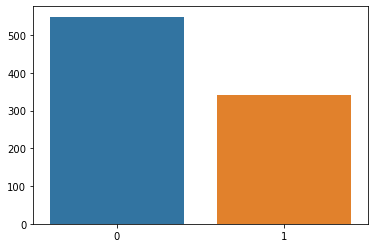

In [7]:
print(df["Survived"].value_counts())
sns.barplot(df["Survived"].value_counts().index, df["Survived"].value_counts().values)
print('Процент данных показывающих целевую группу "выжывших"', round(df["Survived"][df["Survived"] == True].shape[0]/len(df), 2))

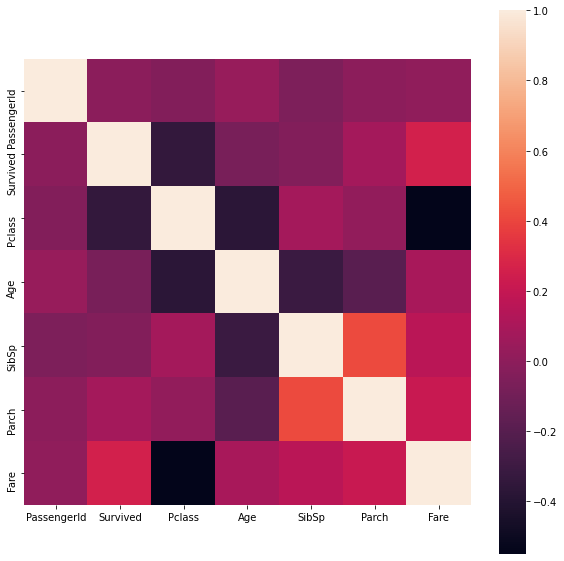

In [8]:

#Построим таблицу корреляции для выявления корреклрующих показателей
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

In [9]:
# 1.
'явно видно, что класс коррелируется со стоимостью билета, это доказывает, что таблица построена корректно.'
'Получается, что на выживаемость оказал класс пассажира, посмотрим на сколько дороже оказались билеты выживших' 

'Получается, что на выживаемость оказал класс пассажира, посмотрим на сколько дороже оказались билеты выживших'

In [10]:
df_count=df.groupby(['Survived','Pclass'])['Fare'].aggregate([min, np.median, max]).reset_index()
df_count.head(10)

,Survived,Pclass,min,median,max
0,0,1,0.0000,44.7500,263.0000
1,0,2,0.0000,13.0000,73.5000
2,0,3,0.0000,8.0500,69.5500
3,1,1,25.9292,77.9583,512.3292
4,1,2,10.5000,21.0000,65.0000
5,1,3,0.0000,8.5167,56.4958


In [11]:
#Видим, что цена билета 1 класса выживших более чем в 3 раза дороже 2 класса.

In [12]:
#2
#Посмотрим сколько выживших имели сестер и братьев

In [13]:
df.groupby(['SibSp','Survived'])['PassengerId'].count().reset_index()

,SibSp,Survived,PassengerId
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


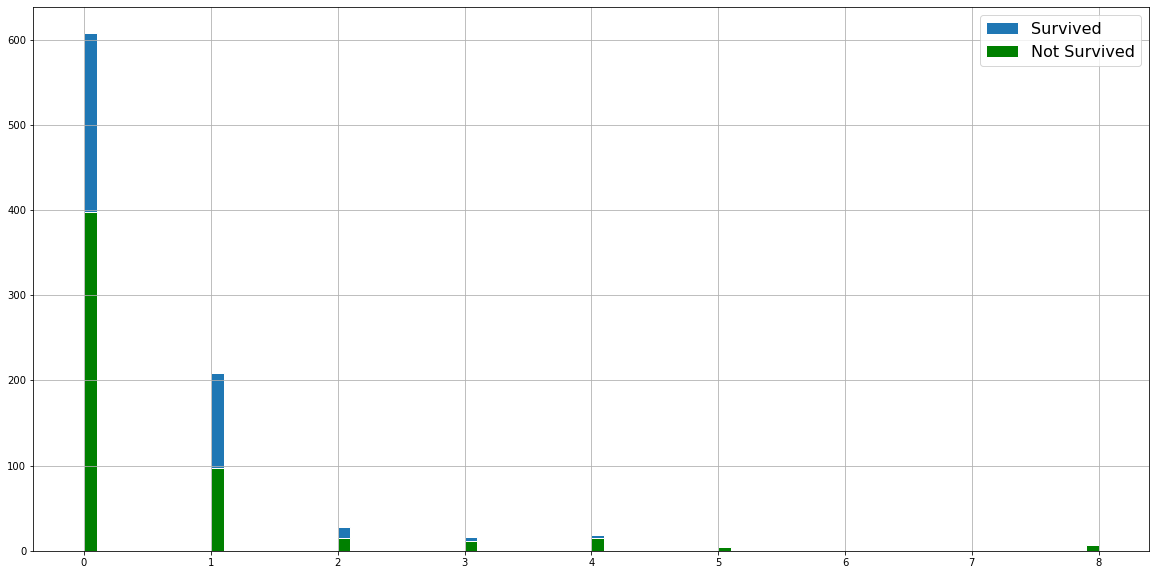

In [14]:
ax = df['SibSp'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

df[df['Survived'] == 0]['SibSp'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})

In [124]:
#3 
# Проверим, повлиял ли возраст на выживаемость


In [206]:
Name_age=['baby','yang', 'old']#создадим категории
df['GropAge']=pd.qcut(df['Age'], q=[0.,.2, .8,1],labels=Name_age)

In [207]:
df.groupby(['Survived','GropAge'])['PassengerId'].count().reset_index()

,Survived,GropAge,PassengerId
0,0,baby,85
1,0,yang,250
2,0,old,89
3,1,baby,79
4,1,yang,158
5,1,old,53


In [203]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GropAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yang
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yang
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yang
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yang
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,yang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,yang
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,baby
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yang


In [185]:
#проверим какой возраст попал в категорию old

In [9]:
df.iloc[df['GropAge']=='old']

KeyError: 'GropAge'

In [230]:
#странно, выходит ошибка: логическое индексирование на основе местоположения для целочисленного типа недоступно
# пробуем по другому:
df.sort_values(by="Age",ascending=False)#фильтруем от большего к меньшему

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GropAge
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,old
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,old
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,old
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,old
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,NaN


In [5]:
# не удалось опознать деапозон криетерия old.
# добавим такой же столбец с критериями, но не будем переимееновывать их
#создадим категории

df['GropAge_']=pd.qcut(df['Age'], q=[0.,.2, .8,1])

In [6]:
df.GropAge_.unique()

[(19.0, 41.0], NaN, (41.0, 80.0], (0.419, 19.0]]
Categories (3, interval[float64]): [(0.419, 19.0] < (19.0, 41.0] < (41.0, 80.0]]

In [4]:
df.Age.fillna(method='ffill').head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [40]:
#4.
# Добавим дополнительный столбец с признаком "Ребенок"
df['Children2'] = (df['Age'] <= 14)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GropAge_,Children,Children2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 41.0]",False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(19.0, 41.0]",False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(19.0, 41.0]",False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(19.0, 41.0]",False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(19.0, 41.0]",False,False



                                                       ))

In [67]:
# Посмотрим долю выживших детей
df.groupby('Children2')['Survived'].aggregate(np.mean)

Children2
False    0.364865
True     0.584416
Name: Survived, dtype: float64

In [ ]:
#Пполучается ,что 58% детей выжили в катастрофе.